# Analysis of RotCoil data for Booster QD Magnets

## (Current: 2 A)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

spec_x = 0.0
spec_x_error = 160  # [um]
spec_y_error = 160  # [um]
spec_exc_error = 0.3  # [%]

# data from M1 set!
data = {
    #Magnet  |             M1               |             M2               |             M3               |
    #        | x0 [mm]  y0 [mm] GL/I [T/mA] | x0 [mm]  y0 [mm] GL/I [T/mA] | x0 [mm]  y0 [mm] GL/I [T/mA] |
    'BQD-001': [+209.9, +117.4, -17.8269, +236.8, +122.3, -17.8060, +236.9, +125.6, -17.8003],
    'BQD-002': [+240.9, +115.7, -17.7620, +238.6, +106.4, -17.7674, +237.8, +108.6, -17.7623],
    'BQD-004': [+214.8,  +89.8, -17.8347, +220.1,  +86.3, -17.8148, +215.6,  +84.1, -17.8029],
    'BQD-005': [+225.4, +141.5, -17.8943, +227.3, +161.5, -17.9305, +228.1, +148.0, -17.9174],
    'BQD-006': [+172.1, +202.3, -18.3250, +180.1, +197.7, -18.2627, +177.1, +204.1, -18.2240],
    'BQD-007': [+235.8, +101.6, -17.9279, +229.7,  +93.1, -17.8620, +226.1,  +84.5, -17.9033],
    'BQD-008': [+244.2, +135.9, -17.9560, +239.9, +136.0, -17.9318, +235.9, +132.3, -17.9123],
    'BQD-009': [+223.3, +110.9, -17.8780, +232.5, +122.7, -17.8606, +245.3, +125.1, -17.8414],
    'BQD-010': [+211.3, +120.4, -17.9354, +211.9, +116.3, -17.9320, +213.5, +131.5, -17.9319],
    'BQD-011': [+201.6, +102.2, -17.9008, +191.6,  +95.4, -17.8807, +199.2,  +81.3, -17.8666],
    'BQD-012': [+243.6, +134.4, -17.9068, +241.4, +157.0, -17.9058, +246.7, +152.9, -17.8991],
    'BQD-013': [+216.8, +131.2, -17.9383, +216.1, +129.9, -17.9557, +224.2, +118.1, -17.9467],
    'BQD-014': [+235.7, +166.9, -17.9485, +234.7, +176.5, -17.9279, +234.2, +172.7, -17.9081],
    'BQD-015': [+233.8, +148.1, -17.9438, +223.5, +136.8, -17.9258, +221.8, +162.2, -17.9194],
    'BQD-016': [+209.5, +120.0, -17.9595, +205.2, +120.7, -17.9549, +208.3, +114.9, -17.9391],
    'BQD-017': [+207.1, +120.1, -17.9093, +202.8, +125.8, -17.9611, +202.8, +146.2, -17.9657],
    'BQD-018': [+227.9, +108.4, -17.9757, +226.7, +137.7, -17.9740, +221.5, +145.9, -17.9360],
    'BQD-019': [+208.1, +123.6, -17.9058, +205.0, +122.8, -17.9163, +210.5, +124.9, -17.9097],
    'BQD-020': [+239.1, +149.5, -16.3315, +264.2, +138.2, -16.3114, +218.7, +102.5, -17.6134],
    'BQD-021': [+218.2, +127.0, -17.8855, +218.2, +124.8, -17.8962, +225.1, +114.4, -17.8865],
    'BQD-022': [+203.8,  +89.4, -17.9396, +206.3, +100.1, -17.9208, +205.8,  +99.8, -17.9128],
    'BQD-023': [+206.8, +132.7, -17.8798, +209.6, +115.6, -17.8586, +207.0, +109.6, -17.8727],
    'BQD-024': [+205.2, +154.3, -17.9780, +204.6, +162.8, -17.9472, +208.2, +167.7, -17.9581],
    'BQD-025': [+171.4, +164.8, -17.7785, +176.1, +181.7, -17.7996, +175.9, +156.7, -17.7730],
    'BQD-026': [+204.6, +111.8, -17.8806, +209.2, +132.9, -17.8608, +218.8, +119.8, -17.8692],
    'BQD-027': [+244.7, +113.3, -17.8535, +223.2, +117.0, -17.8208, +221.9, +109.8, -17.8063],  
}
serials = sorted(data)

for i in range(len(serials)):
    print('{:02d}: {}'.format(i+1, serials[i]))

01: BQD-001
02: BQD-002
03: BQD-004
04: BQD-005
05: BQD-006
06: BQD-007
07: BQD-008
08: BQD-009
09: BQD-010
10: BQD-011
11: BQD-012
12: BQD-013
13: BQD-014
14: BQD-015
15: BQD-016
16: BQD-017
17: BQD-018
18: BQD-019
19: BQD-020
20: BQD-021
21: BQD-022
22: BQD-023
23: BQD-024
24: BQD-025
25: BQD-026
26: BQD-027


# Horizontal Magnet Center

<IPython.core.display.Javascript object>


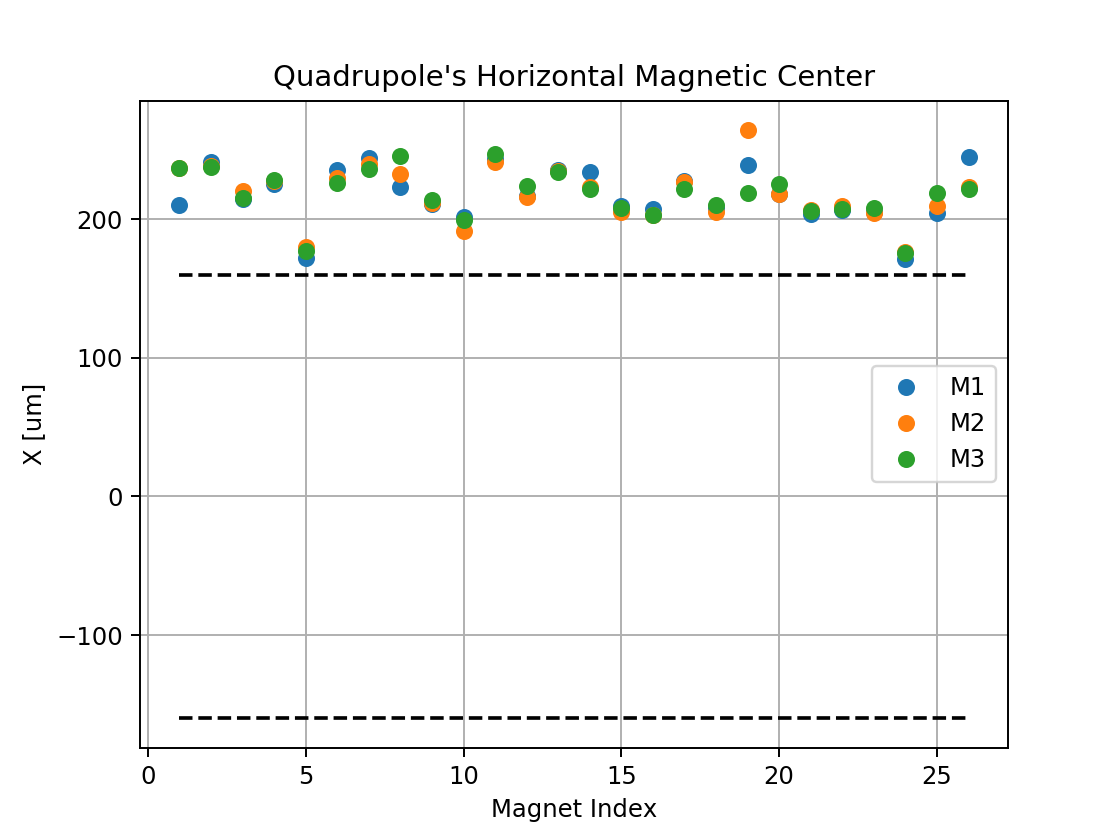

In [49]:
dset = 0  # [0: M1, 1: M2, 2: M3]
dset = 0; d1 = np.array([data[mag][3*dset] for mag in serials])
dset = 1; d2 = np.array([data[mag][3*dset] for mag in serials])
dset = 2; d3 = np.array([data[mag][3*dset] for mag in serials])
n = len(d1)

plt.figure()
plt.plot(range(1,n+1), d1, 'o', label='M1')
plt.plot(range(1,n+1), d2, 'o', label='M2')
plt.plot(range(1,n+1), d3, 'o', label='M3')
plt.plot([1,n], [+spec_x_error,]*2, 'k--')
plt.plot([1,n], [-spec_x_error,]*2, 'k--')
plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('X [um]')
plt.title("Quadrupole's Horizontal Magnetic Center")
plt.legend()
plt.show()

# Vertical Magnet Center

<IPython.core.display.Javascript object>


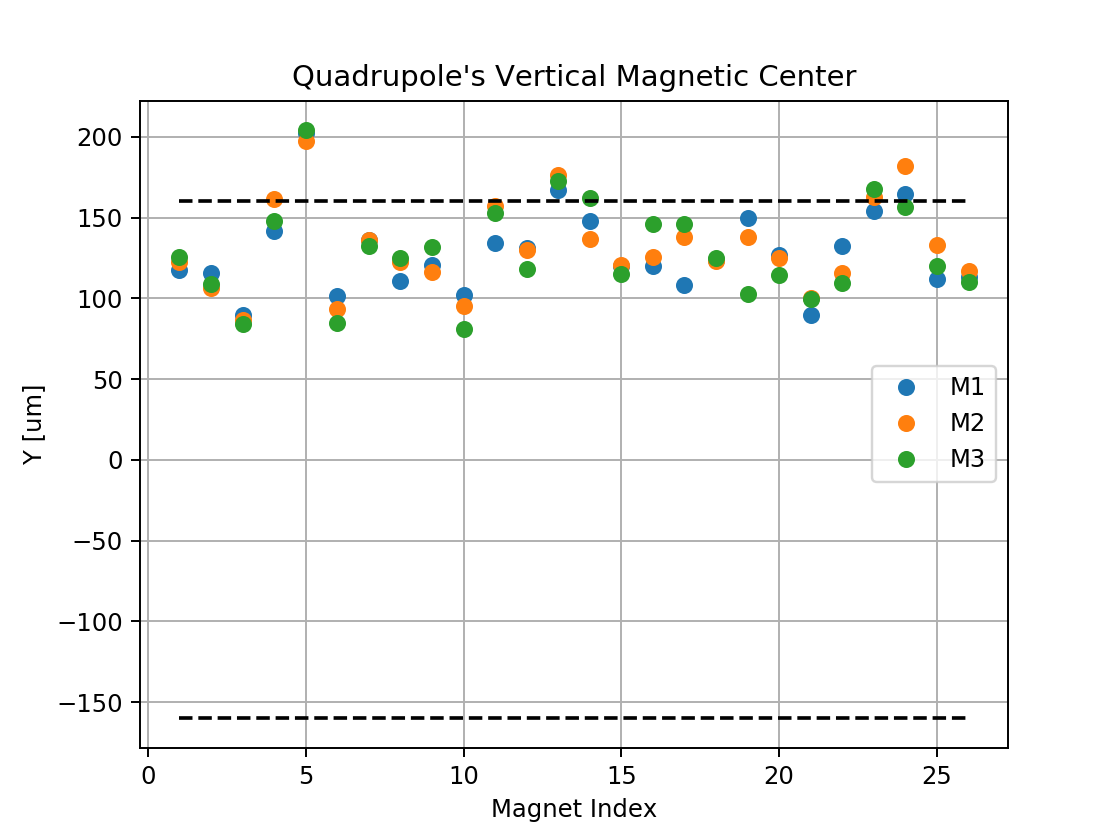

In [50]:
dset = 0  # [0: M1, 1: M2, 2: M3]
dset = 0; d1 = np.array([data[mag][3*dset+1] for mag in serials])
dset = 1; d2 = np.array([data[mag][3*dset+1] for mag in serials])
dset = 2; d3 = np.array([data[mag][3*dset+1] for mag in serials])
n = len(d1)

plt.figure()
plt.plot(range(1,n+1), d1, 'o', label='M1')
plt.plot(range(1,n+1), d2, 'o', label='M2')
plt.plot(range(1,n+1), d3, 'o', label='M3')

plt.plot([1,n], [+spec_y_error,]*2, 'k--')
plt.plot([1,n], [-spec_y_error,]*2, 'k--')
plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('Y [um]')
plt.title("Quadrupole's Vertical Magnetic Center")
plt.legend()
plt.show()

# Excitation

M1 std: 1.79 %
M2 std: 1.79 %
M3 std: 0.57 %


<IPython.core.display.Javascript object>


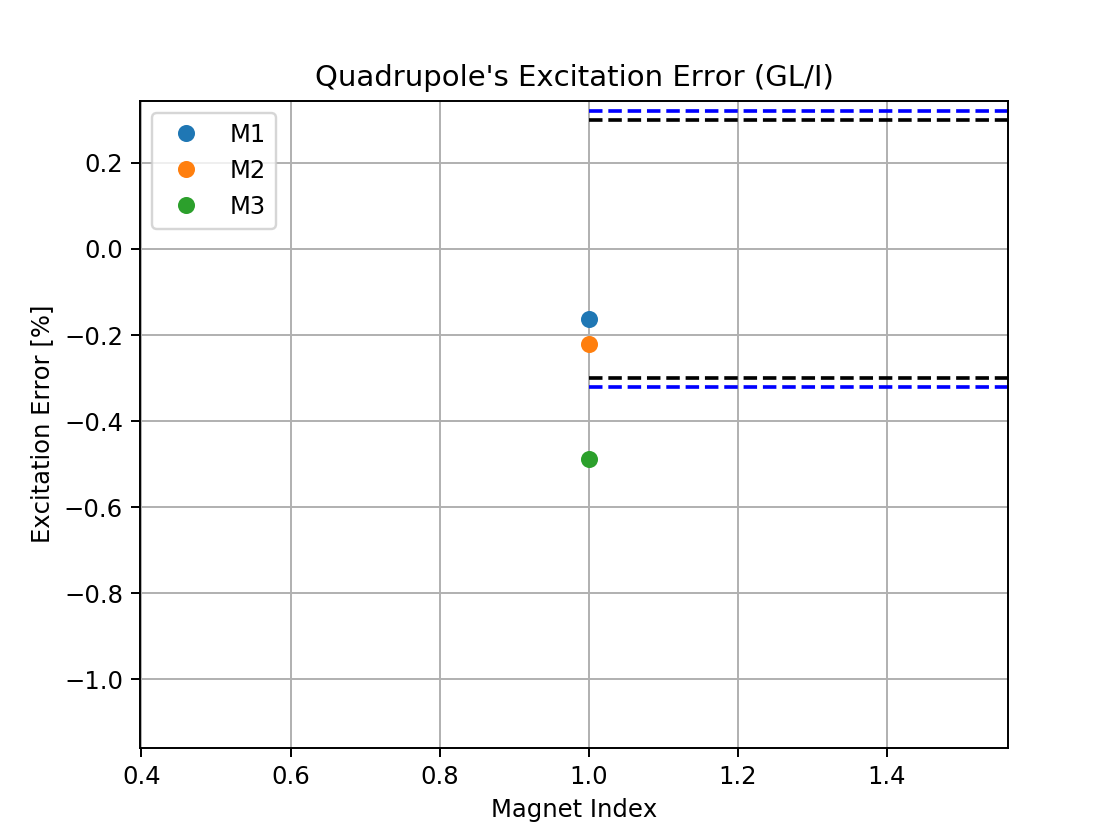

In [2]:
dset = 0  # [0: M1, 1: M2, 2: M3]
dset = 0; d1 = np.array([data[mag][3*dset+2] for mag in serials])
dset = 1; d2 = np.array([data[mag][3*dset+2] for mag in serials])
dset = 2; d3 = np.array([data[mag][3*dset+2] for mag in serials])
n = len(d1)


avg1 = np.mean(d1);
std1 = np.std(d1);
error1 = 100*(d1-avg1)/avg1

avg2 = np.mean(d2);
std2 = np.std(d2);
error2 = 100*(d2-avg2)/avg2

avg3 = np.mean(d3);
std3 = np.std(d3);
error3 = 100*(d3-avg3)/avg3

print('M1 std: {:.2f} %'.format(abs(100*std1/avg1)))
print('M2 std: {:.2f} %'.format(abs(100*std2/avg2)))
print('M3 std: {:.2f} %'.format(abs(100*std3/avg3)))

plt.plot(range(1,n+1), error1, 'o', label='M1')
plt.plot(range(1,n+1), error2, 'o', label='M2')
plt.plot(range(1,n+1), error3, 'o', label='M3')

plt.plot([1,n], [+spec_exc_error,]*2, 'k--')
plt.plot([1,n], [-spec_exc_error,]*2, 'k--')
plt.plot([1,n], [+std1,]*2, 'b--')
plt.plot([1,n], [-std1,]*2, 'b--')
plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('Excitation Error [%]')
plt.title("Quadrupole's Excitation Error (GL/I)")
plt.legend()
plt.show()